# Gradient Boolean Over Decision Trees

# Programming Assignment: Градиентный бустинг над решающими деревьями

In [1]:
import numpy as np
import pandas
import math
from lib.helpersmd import write_to_file

1. Load the features from the gbm-data.csv file with pandas and convert it to the numpy array (the values parameter of the dataframe). The first column of the data file records whether or not there was a reaction. All other columns (d1-d1776) contain different characteristics of the molecule, such as size, shape, etc. Split the sample into the training and test using the train_test_split function with the parameters test_size = 0.8 and random_state = 241.


1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

In [2]:
data=pandas.read_csv('gbm-data.csv')
print data.describe()

          Activity           D1           D2           D3           D4  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.542255     0.076948     0.592436     0.068142     0.038990   
std       0.498278     0.079989     0.105860     0.078414     0.115885   
min       0.000000     0.000000     0.282128     0.000000     0.000000   
25%       0.000000     0.033300     0.517811     0.000000     0.000000   
50%       1.000000     0.066700     0.585989     0.050000     0.000000   
75%       1.000000     0.100000     0.668395     0.100000     0.000000   
max       1.000000     1.000000     0.964381     0.950000     1.000000   

                D5           D6           D7           D8           D9  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.212112     0.686653     0.274713     0.455133     0.749517   
std       0.102592     0.078702     0.090017     0.162731     0.071702   
min       0.002630     0.137873     0

In [3]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, Activity to D1776
dtypes: float64(942), int64(835)
memory usage: 50.9 MB
None


In [4]:
print data.tail()

      Activity        D1        D2    D3   D4        D5        D6        D7  \
3746         1  0.033300  0.506409  0.10  0.0  0.209887  0.633426  0.297659   
3747         1  0.133333  0.651023  0.15  0.0  0.151154  0.766505  0.170876   
3748         0  0.200000  0.520564  0.00  0.0  0.179949  0.768785  0.177341   
3749         1  0.100000  0.765646  0.00  0.0  0.536954  0.634936  0.342713   
3750         0  0.133333  0.533952  0.00  0.0  0.347966  0.757971  0.230667   

            D8        D9  ...    D1767  D1768  D1769  D1770  D1771  D1772  \
3746  0.376124  0.727093  ...        0      0      0      0      0      0   
3747  0.404546  0.787935  ...        0      0      1      0      1      0   
3748  0.471179  0.872241  ...        0      0      0      0      0      0   
3749  0.447162  0.672689  ...        0      0      0      0      0      0   
3750  0.272652  0.854116  ...        0      0      0      0      0      0   

      D1773  D1774  D1775  D1776  
3746      0      0      0  

In [5]:
data=data.as_matrix()
y=data[:,0]
X=data[:,1:]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

2- Train GradientBoostingClassifier with the parameters n_estimators = 250, verbose = True, random_state = 241 and for each value of learning_rate from the list [1, 0.5, 0.3, 0.2, 0.1], do the following:
    - Use the staged_decision_function method to predict the quality of the training and test sample at each iteration.
    - Convert the obtained prediction with the help of the sigmoid function according to the formula :
<center>$1 / (1 + e ^ {-y_{pred}})$</center>
    , where $y_{pred}$ is the predicted value.
    - Calculate and plot the log-loss (which can be calculated using the function sklearn.metrics.log_loss) on the -   training and test samples, and find the minimum value of the metric and the iteration number on which it is reached.

2- Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
    - Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    - Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.
    - Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [7]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

def plotLoss(test_loss,train_loss,learning_rate):
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(test_loss, 'g', linewidth=2)
    plt.plot(train_loss, 'r', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title("learning rate = {}".format(learning_rate))
    plt.xlabel("number of iteration")
    plt.ylabel("Loss")
    plt.show()

      Iter       Train Loss   Remaining Time 
         1           1.0190           18.04s
         2           0.9192           21.35s
         3           0.8272           18.67s
         4           0.7834           17.00s
         5           0.7109           16.20s
         6           0.6368           16.17s
         7           0.5797           16.03s
         8           0.5610           15.83s
         9           0.5185           16.00s
        10           0.4984           16.52s
        20           0.1999           16.36s
        30           0.1313           14.65s
        40           0.0790           13.38s
        50           0.0511           12.45s
        60           0.0352           11.57s
        70           0.0245           10.73s
        80           0.0162           10.03s
        90           0.0114            9.32s
       100           0.0077            8.67s
       200           0.0004            2.51s


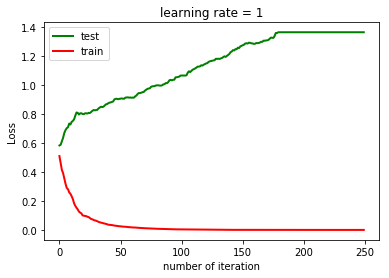

      Iter       Train Loss   Remaining Time 
         1           1.1255           17.27s
         2           1.0035           16.99s
         3           0.9386           16.65s
         4           0.8844           16.14s
         5           0.8381           15.67s
         6           0.7995           15.09s
         7           0.7559           14.71s
         8           0.7205           14.45s
         9           0.6958           14.21s
        10           0.6725           13.99s
        20           0.4672           12.87s
        30           0.3179           12.36s
        40           0.2274           11.77s
        50           0.1774           11.20s
        60           0.1394           10.61s
        70           0.1050           10.07s
        80           0.0805            9.52s
        90           0.0650            8.89s
       100           0.0511            8.37s
       200           0.0058            2.84s


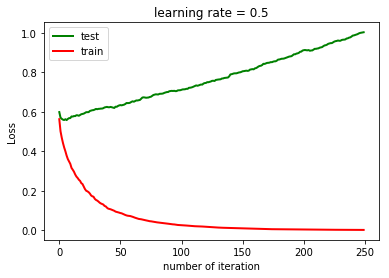

      Iter       Train Loss   Remaining Time 
         1           1.2095           16.72s
         2           1.1006           16.64s
         3           1.0240           16.65s
         4           0.9729           16.54s
         5           0.9387           16.09s
         6           0.8948           16.06s
         7           0.8621           15.67s
         8           0.8360           15.29s
         9           0.8171           14.90s
        10           0.7883           14.65s
        20           0.6164           13.23s
        30           0.4933           13.04s
        40           0.4248           12.28s
        50           0.3345           11.64s
        60           0.2760           10.95s
        70           0.2263           10.38s
        80           0.1971            9.78s
        90           0.1693            9.21s
       100           0.1388            8.72s
       200           0.0294            2.96s


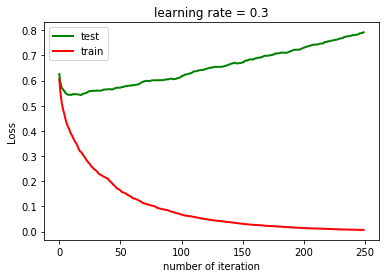

      Iter       Train Loss   Remaining Time 
         1           1.2613           17.17s
         2           1.1715           21.03s
         3           1.1009           22.80s
         4           1.0529           23.27s
         5           1.0130           23.95s
         6           0.9740           23.99s
         7           0.9475           22.43s
         8           0.9197           21.75s
         9           0.8979           20.61s
        10           0.8730           20.01s
        20           0.7207           15.90s
        30           0.6055           14.45s
        40           0.5244           13.20s
        50           0.4501           12.22s
        60           0.3908           11.64s
        70           0.3372           11.29s
        80           0.3009           11.06s
        90           0.2603           11.01s
       100           0.2327           10.70s
       200           0.0835            3.45s


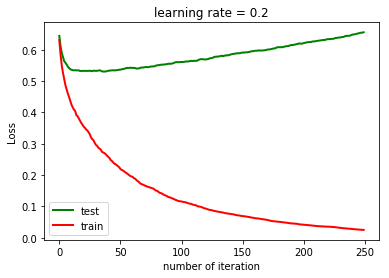

      Iter       Train Loss   Remaining Time 
         1           1.3199           25.45s
         2           1.2645           25.14s
         3           1.2170           26.19s
         4           1.1775           27.00s
         5           1.1404           27.95s
         6           1.1106           27.08s
         7           1.0844           26.25s
         8           1.0617           25.43s
         9           1.0411           24.98s
        10           1.0223           24.84s
        20           0.8864           23.67s
        30           0.7844           20.78s
        40           0.7176           19.23s
        50           0.6590           17.93s
        60           0.6120           16.87s
        70           0.5599           16.36s
        80           0.5242           15.00s
        90           0.4829           13.92s
       100           0.4473           12.94s
       200           0.2379            3.56s


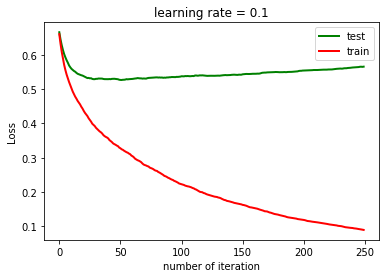

In [8]:
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier

learning_rates=[1, 0.5, 0.3, 0.2, 0.1]
testQualities=[]
for value in learning_rates:
    clf=GradientBoostingClassifier(n_estimators=250,verbose=True, random_state=241,learning_rate=value)
    clf.fit(X_train, y_train)
    gen1=clf.staged_decision_function(X_train)
    ypredTrain=[]
    qualityTrain=[]
    for c in gen1:
        pred=sigmoid(c)
        q=log_loss(y_train,pred)
        ypredTrain.append(pred)
        qualityTrain.append(q)
    #plotLoss(qualityTrain)
    gen2=clf.staged_decision_function(X_test)    
    ypredTest=[]
    qualityTest=[]
    for c in gen2:
        pred=sigmoid(c)
        q=log_loss(y_test,pred)
        ypredTest.append(pred)
        qualityTest.append(q)
    testQualities.append(qualityTest)
    plotLoss(qualityTest,qualityTrain,value)

3- How can you characterize the quality chart on a test sample, starting with some iteration: overfitting or underfitting? In response, indicate one of the words overfitting or underfitting.

3- Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

In [9]:
write_to_file('overfitting',"week%d-A%dT%d.out"%(5,2,1))

4- Give the minimum value of log-loss on the test sample and the iteration number on which it is reached, with learning_rate = 0.2.

4- Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [10]:
v=min(testQualities[3])
p=testQualities[3].index(v)+1
report="{:0.2f} {}".format(v,p)#str(round(v,2))+' '+str(p)
write_to_file(report,"week%d-A%dT%d.out"%(5,2,2))
print report

0.53 37


5- On the same data, train RandomForestClassifier with the number of trees equal to the number of iterations, which achieves the best quality for the gradient boost from the previous paragraph, with random_state = 241 and the rest of the default parameters. What is the value of log-loss on the test obtained from this random forest? (Do not forget that you need to get predictions using the function predict_proba. In this case, you do not need to take the sigmoid from the probability estimation of the class)

5-  На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=241,n_estimators=p)
clf.fit(X_train,y_train)
yp=clf.predict_proba(X_test)
loss=log_loss(y_test,yp)
write_to_file("{:0.2f}".format(loss),"week%d-A%dT%d.out"%(5,2,3))
print "loss = {:0.2f}".format(loss)

loss = 0.54
